In [24]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import uproot
import mplhep as hep
plt.style.use(hep.style.ATLAS)

In [25]:
ouput_dir = Path("/data/hrzhao/MyOutputs/Run2GMCombination/MyCheckComb/02272024/")

root_file_names = ["limits_WZ_sin.root", "limits_ssWW_sin.root", "limits_Combination_sin.root"]
variants = ["limitsGM", "limitsGM_JESJERUncor", "limitsGM_noJESJER"]

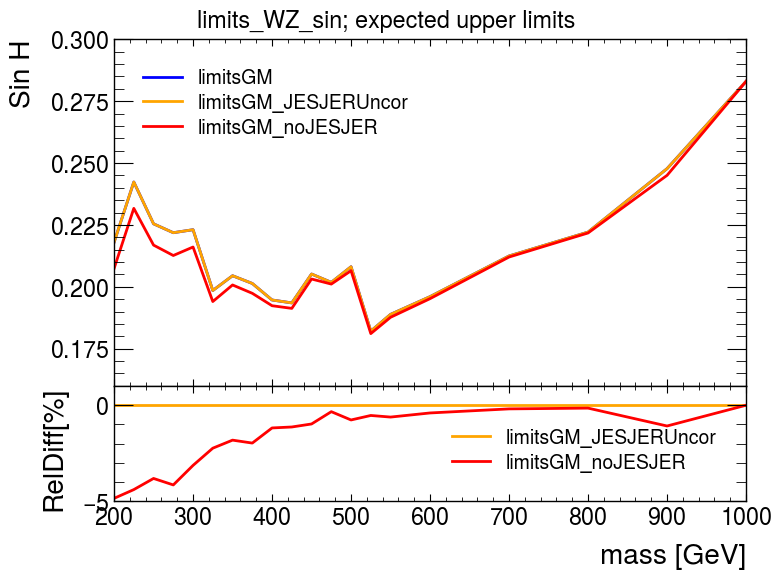

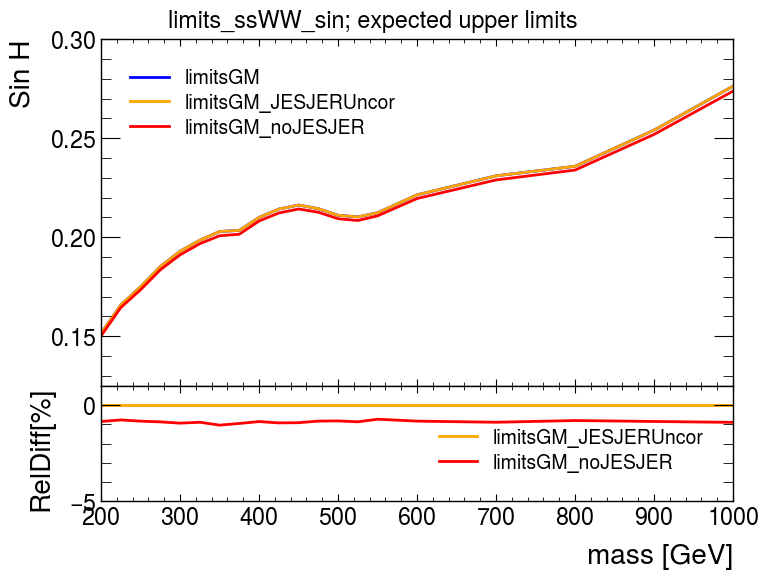

In [26]:
for root_file_name in root_file_names:
    dict_exp_upper_limits = dict.fromkeys(variants)
    dict_obs_upper_limits = dict.fromkeys(variants)

    for variant in variants:
        variant_path = ouput_dir / f"Benchmark_{variant}" / "Plots"
        root_file_path = variant_path / root_file_name

        assert root_file_path.exists(), f"{root_file_path} does not exist."

        root_file = uproot.open(root_file_path)
        mass_points, exp_upper_limits = uproot.open(root_file_path)['exp'].values()
        dict_exp_upper_limits[variant] = exp_upper_limits

        mass_points, obs_upper_limits = uproot.open(root_file_path)['obs'].values()
        dict_obs_upper_limits[variant] = obs_upper_limits


    pd_exp_upper_limits = pd.DataFrame(dict_exp_upper_limits, index=mass_points)
    pd_exp_upper_limits.index.name = "mass" 

    pd_obs_upper_limits = pd.DataFrame(dict_obs_upper_limits, index=mass_points)
    pd_obs_upper_limits.index.name = "mass"

    pd_exp_upper_limits[f"{variants[1]}-RelDiff[%]"] = (pd_exp_upper_limits[variants[1]] - pd_exp_upper_limits[variants[0]]) / pd_exp_upper_limits[variants[0]] * 100
    pd_exp_upper_limits[f"{variants[2]}-RelDiff[%]"] = (pd_exp_upper_limits[variants[2]] - pd_exp_upper_limits[variants[0]]) / pd_exp_upper_limits[variants[0]] * 100

    colors = ['blue', 'orange', 'red']
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})
    for i, variant in enumerate(variants):
        ax0.plot(pd_exp_upper_limits.index, pd_exp_upper_limits[variant], label=variant, color = colors[i])

    ax0.legend()
    ax0.set_ylabel("Sin H")

    for i, variant in enumerate(variants[1:]):
        ax1.plot(pd_exp_upper_limits.index, pd_exp_upper_limits[f"{variant}-RelDiff[%]"], 
                label=f"{variant}", color=colors[i+1])

    ax1.set_xlabel("mass [GeV]")
    ax1.set_ylabel("RelDiff[%]")
    ax1.set_ylim(-5, 1)
    ax1.legend()

    fig.suptitle(f"{root_file_name[:-5]}; expected upper limits")

In [28]:
pd_exp_upper_limits

limitsGM  limitsGM_JESJERUncor  limitsGM_noJESJER  \
mass                                                        
200.0   0.142160              0.142529           0.139513   
225.0   0.156273              0.156775           0.153696   
250.0   0.159939              0.160433           0.156864   
275.0   0.165737              0.166057           0.161786   
300.0   0.170316              0.170813           0.166989   
325.0   0.164223              0.164398           0.161394   
350.0   0.168531              0.169003           0.165969   
375.0   0.167111              0.167474           0.164566   
400.0   0.166708              0.167124           0.164934   
425.0   0.167127              0.167420           0.165465   
450.0   0.173491              0.173890           0.172007   
475.0   0.171315              0.171658           0.170751   
500.0   0.172712              0.173411           0.171647   
525.0   0.159623              0.160060           0.158730   
550.0   0.163780              0.164206           0.162839   
600.0   0.170325              0.170755           0.169528   
700.0   0.180750              0.181201           0.180247   
800.0   0.186012              0.186699           0.185700   
900.0   0.203447              0.204344           0.202376   
1000.0  0.226689              0.227703           0.226412   

        limitsGM_JESJERUncor-RelDiff[%]  limitsGM_noJESJER-RelDiff[%]  
mass                                                                   
200.0                          0.259890                     -1.861485  
225.0                          0.321552                     -1.648436  
250.0                          0.309262                     -1.922698  
275.0                          0.192827                     -2.384237  
300.0                          0.291835                     -1.953606  
325.0                          0.106907                     -1.722137  
350.0                          0.279905                     -1.520400  
375.0                          0.217109                     -1.523000  
400.0                          0.249321                     -1.064348  
425.0                          0.175335                     -0.994242  
450.0                          0.229635                     -0.855748  
475.0                          0.199986                     -0.329501  
500.0                          0.404978                     -0.616385  
525.0                          0.273475                     -0.559674  
550.0                          0.260530                     -0.574385  
600.0                          0.252898                     -0.467766  
700.0                          0.249564                     -0.278311  
800.0                          0.369565                     -0.167756  
900.0                          0.441065                     -0.526532  
1000.0                         0.447102                     -0.122199